In [1]:
import numpy as np
import powerspectrum as ps
import posterior as pt
import random_num as rn
import os
import matplotlib.pyplot as plt

In [2]:
sigma_nu=2*np.pi/180/60
Tcmb=2.75*10**6
theta_nu=30*np.pi/180/60
spectrum=np.zeros(2002)

for i in np.arange(2,2002,1):
    spectrum[i-2]=(sigma_nu/Tcmb)**2*np.exp(i*(i+1)*theta_nu**2/8/np.log(2))

In [3]:
def error_cal(CL,NNs,ell):
    errors=np.zeros(ell-2)
    f_sky=1
    delta_l=1
    for i in np.arange(2,ell,1):
        errors[i-2]=((CL[i-2]+NNs[i-2])/np.sqrt((i+0.5)*f_sky*delta_l))
    return errors

In [5]:
def plot_ps(data1,data2,ell_E,ell_B,error_E,error_B):
    #data2=np.loadtxt('/home/hcjiang/class/output/base_2018_plikHM_TTTEEE_lowl_lowE_lensing00_cl_lensed.dat')
    l1=data1[:,0]
    l2=data2[:,0]
    EE1=data1[:,1]
    EE2=data2[:,1]
    #plt.plot(l1[0:ell_E-2],EE1[0:ell_E-2],label="random")
    plt.errorbar(l1[0:ell_E-2],EE1[0:ell_E-2],yerr=error_E[0:ell_E-2],label="exp")
    plt.plot(l2[0:ell_E-2],EE2[0:ell_E-2],label="best-fit")
    plt.yscale('log')
    plt.legend()
    plt.show()

    BB1=data1[:,2]
    BB2=data2[:,2]
    #plt.plot(l1[0:ell_B-2],BB1[0:ell_B-2],label="random")
    plt.errorbar(l1[0:ell_B-2],BB1[0:ell_B-2],yerr=error_B[0:ell_B-2],label="exp")
    plt.plot(l2[0:ell_B-2],BB2[0:ell_B-2],label="best-fit")
    plt.yscale('log')
    plt.legend()
    plt.show()



In [6]:
best_fit_10=np.load("/home/hcjiang/class/result_24_03_06/small/10/best_fit.npy")
best_fit_10_2002=np.load("/home/hcjiang/class/result_24_03_06/small/10_2002/best_fit.npy")
best_fit_2002=np.load("/home/hcjiang/class/result_24_03_06/small/2002/best_fit.npy")

In [7]:
best_fit_10

array([[9.5040e-04, 9.1182e+00],
       [9.6000e-03, 9.1182e+00]])

In [8]:
def chi2(spectrum,Cl_fid,Cl,ell=10):
        sum=0
        for i in range(ell-2):
            sum+=(2*(i+2)+1)*((Cl_fid[i]+spectrum[i])/(Cl[i]+spectrum[i])+np.log(Cl[i]+spectrum[i])-(2*(i+2)-1)/(2*(i+2)+1)*np.log(Cl_fid[i]+spectrum[i]))
        return sum

In [9]:
chi2_10=[]
chi2_10_2002=[]
chi2_2002=[]

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1083.827489
    giving an angle 100*theta_* = 1.044984
 -> baryon drag stops at z = 1059.904922
    corresponding to conformal time = 286.319506 Mpc
    with comoving sound horizon rs = 147.072910 Mpc
 -> reionization with optical depth = 0.068761
    corresponding to conformal time = 4887.522146 Mpc


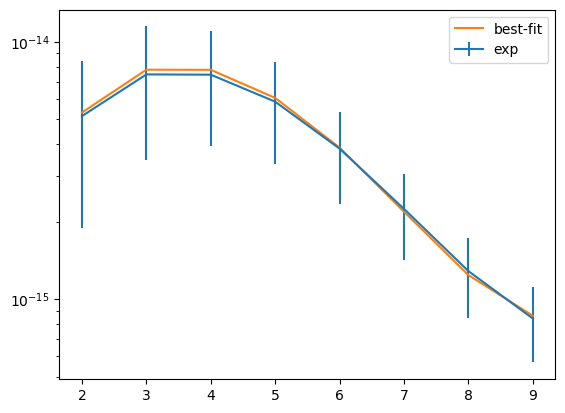

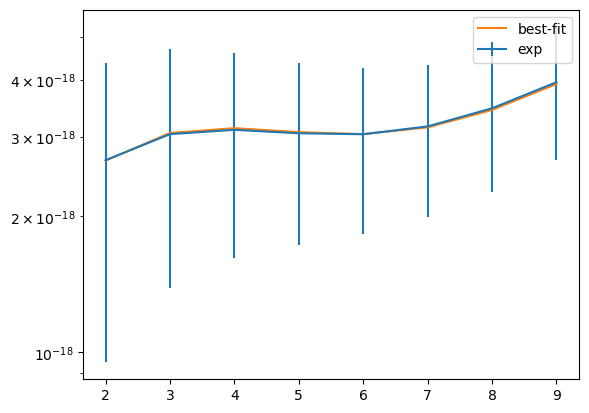

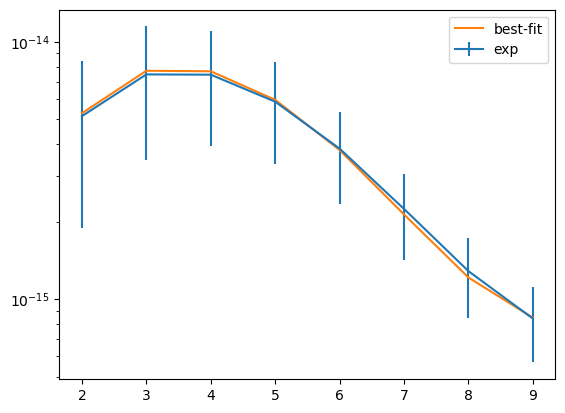

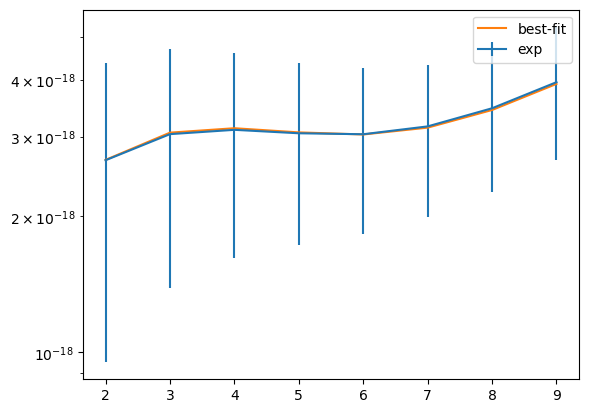

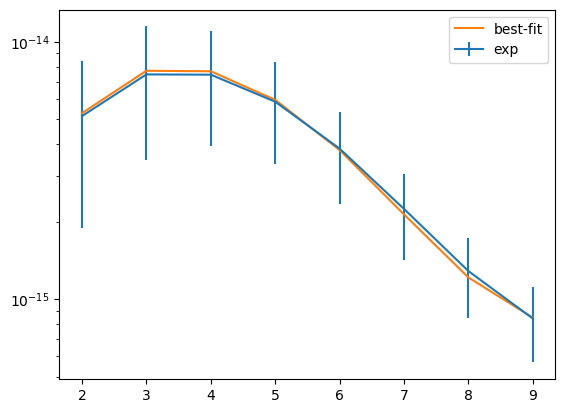

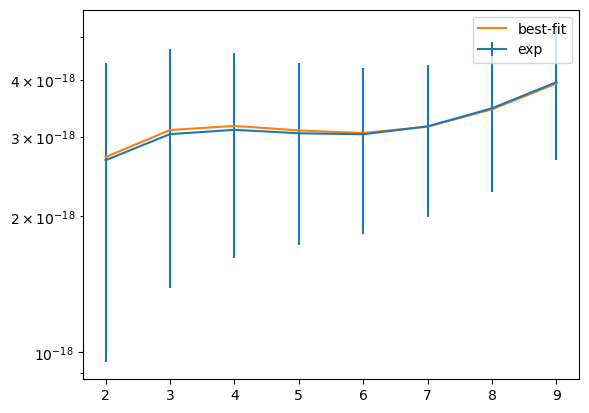

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1083.827489
    giving an angle 100*theta_* = 1.044984
 -> baryon drag stops at z = 1059.904922
    corresponding to conformal time = 286.319506 Mpc
    with comoving sound horizon rs = 147.072910 Mpc
 -> reionization with optical depth = 0.068761
    corresponding to conformal time = 4887.522146 Mpc


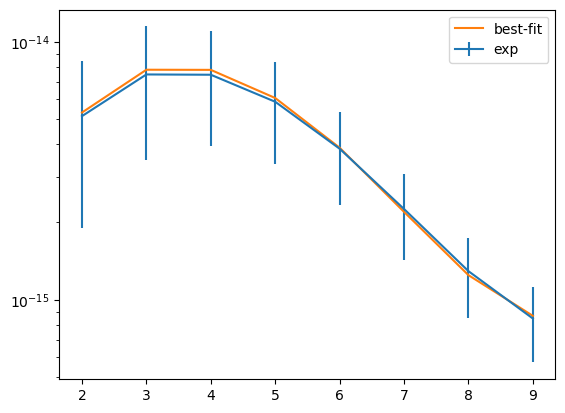

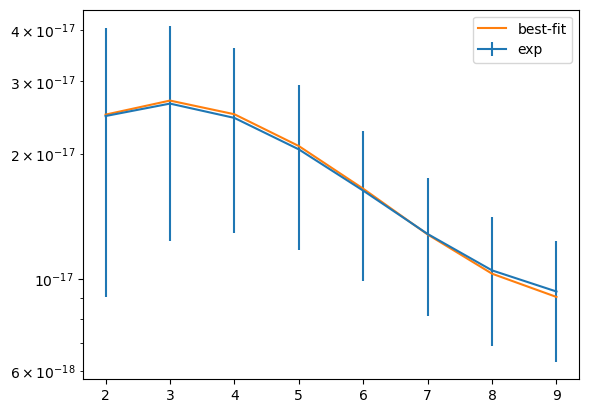

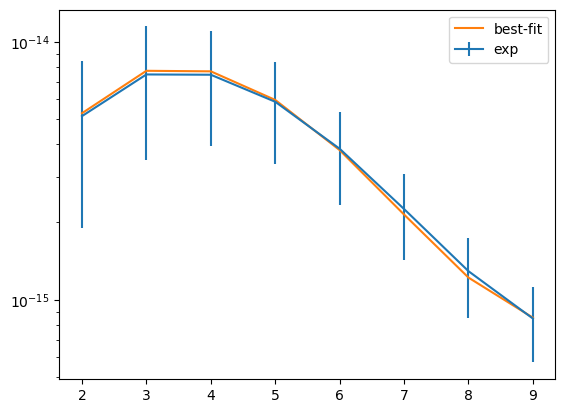

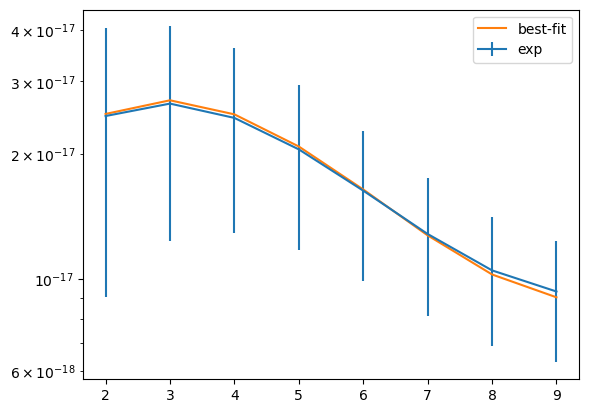

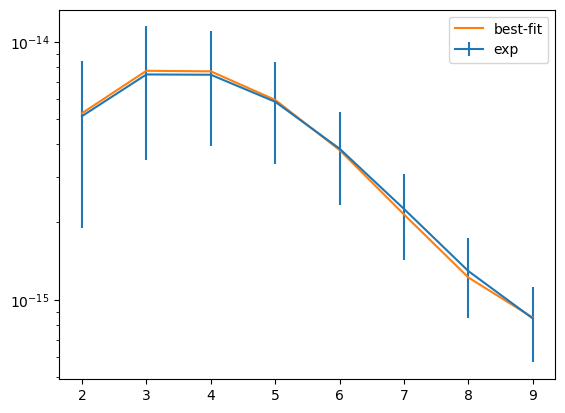

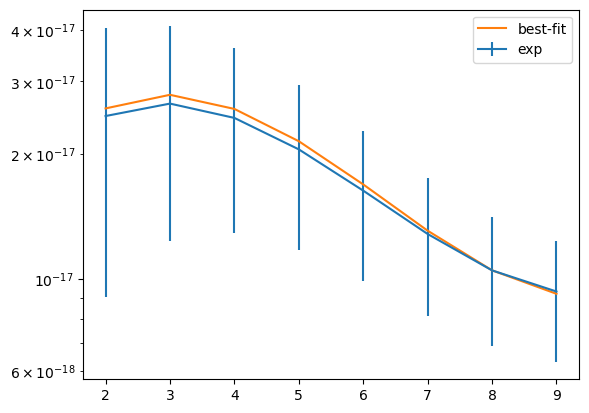

In [10]:
rs=[0.001,0.01]
for i in range(len(rs)):
    ps.write_ps("a_check",["r","z_reio"],[rs[i],8.5],"reio_mine")
    os.system("./class a_check.ini")

    data1=np.loadtxt("/home/hcjiang/class/output/a_check00_cl_lensed.dat")
    error_E=error_cal(data1[:,1],spectrum,2002)
    error_B=error_cal(data1[:,2],spectrum,2002)

    #10
    ps.write_ps("fit",["r","z_reio"],best_fit_10[i],verbose=False)
    os.system("./class fit.ini")
    data2=np.loadtxt("/home/hcjiang/class/output/fit00_cl_lensed.dat")
    plot_ps(data1,data2,10,10,error_E,error_B)
    chi2_10.append(chi2(spectrum,data1[:,1],data2[:,1])+chi2(spectrum,data1[:,2],data2[:,2]))
    os.system("rm -rf /home/hcjiang/class/output/fit*dat")

    #10_2002
    ps.write_ps("fit",["r","z_reio"],best_fit_10_2002[i],verbose=False)
    os.system("./class fit.ini")
    data2=np.loadtxt("/home/hcjiang/class/output/fit00_cl_lensed.dat")
    plot_ps(data1,data2,10,10,error_E,error_B)
    chi2_10_2002.append(chi2(spectrum,data1[:,1],data2[:,1])+chi2(spectrum,data1[:,2],data2[:,2]))
    os.system("rm -rf /home/hcjiang/class/output/fit*dat")

    #2002
    ps.write_ps("fit",["r","z_reio"],best_fit_2002[i],verbose=False)
    os.system("./class fit.ini")
    data2=np.loadtxt("/home/hcjiang/class/output/fit00_cl_lensed.dat")
    plot_ps(data1,data2,10,10,error_E,error_B)
    chi2_2002.append(chi2(spectrum,data1[:,1],data2[:,1])+chi2(spectrum,data1[:,2],data2[:,2]))
    os.system("rm -rf /home/hcjiang/class/output/fit*dat")

    os.system("rm -rf /home/hcjiang/class/output/a_check*dat")
    